# Critical Analysis on Mobile Price Dataset

In this critical analysis report, I analyzed the Mobile Price Dataset and identified areas where improvements can be made in terms of correctly and accurately training models based on the given dataset. This report aims to address these identified gaps and provide sample codes (if necessary) that will improve the given notebook on Mobile Price Dataset. The report consists of Seven main findings where improvements can be made. The outline of the report is as follows:


Finding 1. Data Cleanup

Finding 2. Data Distribution

Finding 3. Feature Selection

Finding 4. Use of a Baseline Model

Finding 5. Decision Tree Cross-Validation

Finding 6. Hyperparameters Setting

Finding 7. Evaluation of the Decision Tree Model

Conclusion/Overall Findings

### 1. Data Cleanup

For any Data Analysis project, it is vital to cleanup the dataset which includes the handling of missing and invalid values should there be any as these may significantly alter the outcome of the models. This is why for the very first part of the report, we will be tackling, Data Cleanup. The Analysis done on mobile prices performed no missing data checks. It should have at the very least, checked for missing values using sample codes below.

#### 1.1 Missing Data

In [ ]:
#This code checks each column of the data for any missing values.
#Displays the names of the columns with missing values and their corresponding number of missing values. 
#Prints the length of the data before removing the missing data.

missing_values = data.isnull().sum()

print(missing_values)

data.shape

After checking, depending on the size of the dataset and the characteristics of the features; the missing data can be removed or can be injected with values such as the mean value of that feature. 

##### 1.1.1 Removal of Missing Data

Should it be determined based on preliminary feature analysis that it would be best to remove the missing data, (e.g. if there are very few records with missing data), the sample code below can be done to remove missing data.

In [ ]:
#This code removes any row that contains at least one missing value 
dropped_missing = data.dropna()

#This code checks that the resulting dataset has no missing value anymore
print(dropped_missing.isnull().sum())

##### 1.1.2 Replacement of Missing Data

Should it be determined based on preliminary feature analysis that it would be best to replace the missing data with the mean value for example, the sample code below can be used.

In [ ]:
#This code assigns mean values to battery power with null values.
data['battery_power'] = data['battery_power'].fillna(data['battery_power'].mean())

#### 1.2. Invalid Data

Part of the cleanup process includes the handling of invalid values should there be any, as these may result to errors later on. The Analysis offered no invalid data checks. With this, sample codes below can be used to handle invalid data should there be any.

In [ ]:
#First and foremost, this code can be used to check the unique values of features that may need to be handled
#Using the battery_power feature as an example

data['battery_power'].unique()

In [ ]:
# This sample code replaces/removes possible symbols that may make certain data invalid
data['battery_power'] = data['battery_power'].str.replace('$', '').str.replace('M', '').str.replace('K', '').str.replace(',', '').str.replace('*', '0')

#This code checks that value replacement was successful
data.head()

Another step which was not performed was to check for the features' data types. The sample codes below aims to check for any data types that need to be converted.

In [ ]:
#This code checks if there are any other features in need of conversion
data.info()

In [ ]:
#For example, after the check and preliminary analysis, the battery_power column needs to be converted to numeric
data['battery_power'] = pd.to_numeric(data['battery_power'], errors='coerce')

#This code checks that conversion to numeric was successful
data.head()

#### 1.3. Duplicates Handling

Another vital step for the cleanup process is the checking for duplicate data as these may affect the findings of the analysis. The sample codes below aims to check and handle duplicate data.

In [ ]:
#This code drops duplicate data
deduped_data = data.drop_duplicates()

#### 1.4. Outliers Handling

It also does not help that the analysis done did not perform any outliers check. Outliers need to be handled simply because these may effect the findings of the data analysis which are usually based on the aggregation of data. The sample codes below can be used to check for outliers using box plots.

In [ ]:
#This code plots a box plot of the dataset
plt.figure(figsize = (10, 6))
sns.boxplot(data = data)
plt.title('Box Plot of Dataset', size = 25)
plt.xlabel('Columns', size = 18)
plt.ylabel('Values', size = 18)
plt.xticks(rotation = 0)
plt.show()

From the box plot generated above, the range of variation of the different features can already be assessed along with the presence of outliers. To have a clearer view of the box plots, considering that this dataset has 20 features, the code below can be used to generate zoomed in box plots.

In [ ]:
#This code generates subplots of the boxplots of 4 selected sample features

plt.figure(figsize = (16, 6))

plt.subplot(1, 4, 1)
plt.title('Battery Power', size = 18)
sns.boxplot(data = data['battery_power'])

plt.subplot(1, 4, 2)
plt.title('Clock Speed', size = 18)
sns.boxplot(data = data['clock_speed'])

plt.subplot(1, 4, 3)
plt.title('RAM', size = 18)
sns.boxplot(data = data['ram'])

plt.subplot(1, 4, 4)
plt.title('Talk Time', size = 18)
sns.boxplot(data = data['talk_time'])

plt.show()

Based on the analysis of the box plots, the outliers can either be removed, replaced or transformed later on.

### 2. Data Distribution

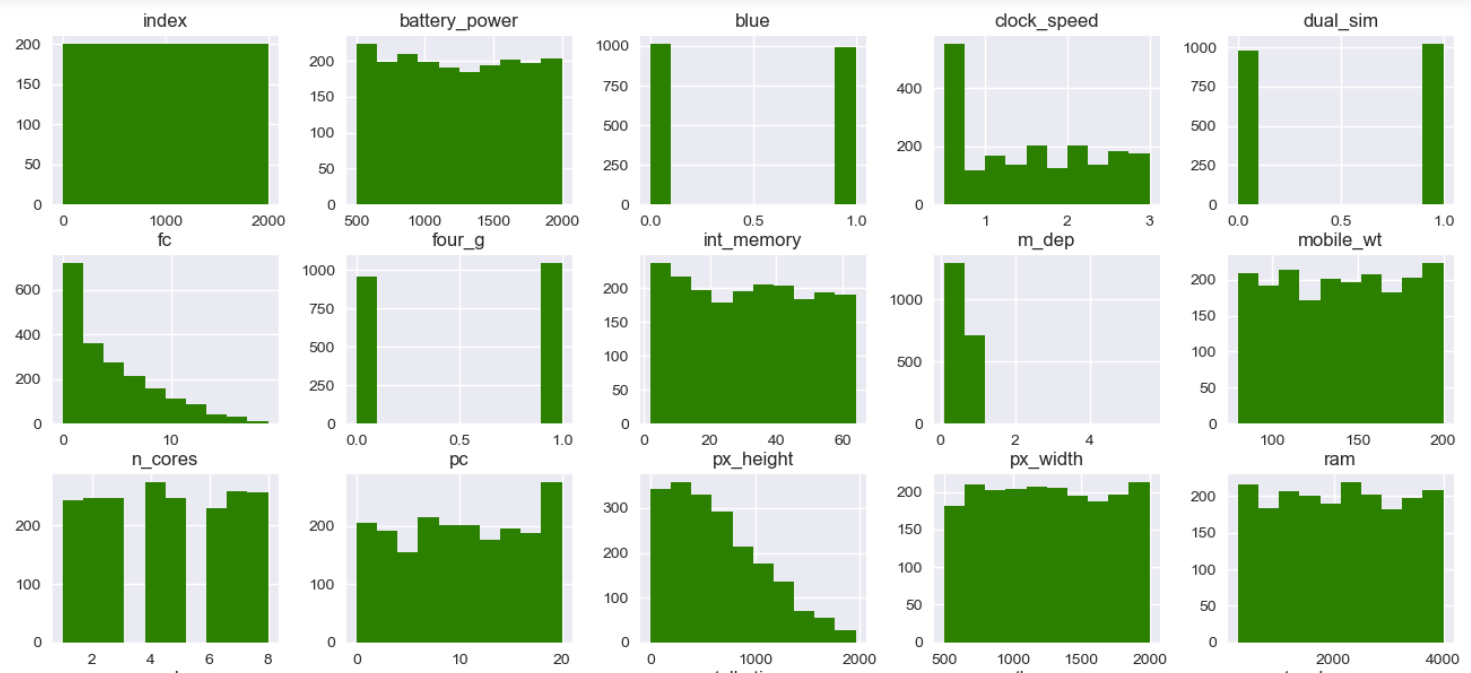

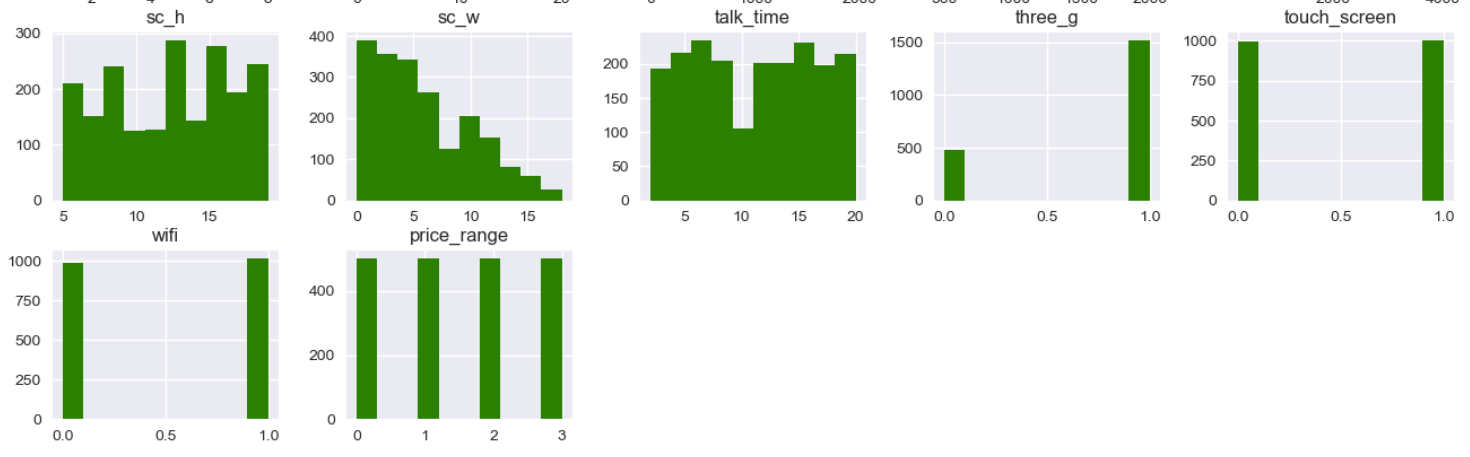

From the screenshots above of the histograms of the features of the Mobile Dataset, it is evident that majority of the features were not normally distributed, and were left unhandled. This means that despite having large value discrepancies, the dataset was used as inputs for models without undergoing normalization. With this said, the codes below can be used to normalize the dataset.

In [ ]:
#This code imports the Standard Scaler package
from sklearn.preprocessing import StandardScaler

#This code applies standard scaler to all features to be normalized
scaler = StandardScaler()

#Suppose all features need to be transformed based on the analysis conducted, code below can be used

data = scaler.fit_transform(data.values.reshape(-1, 1))

### 3. Feature Selection

The Mobile Dataset Analysis went straight to the splitting, training and testing of data without conducting features analysis. This practice is very important for the feature selection process as often times, using an excess number of features as inputs for models cause 'Curse of Dimensionality' where the performance and complexity of the models degrade significantly as the number of input features increases. This is primarily because as the number of features increase, the more difficult it is for the models to capture meaningful patterns or relationships among the vast number of features. With this said, the following methods can be done to perform feature selection along with relevant codes.

#### 3.1 Relationship Analysis

In [ ]:
#This code gets the correlation matrix of the data

corr = data.corr()

Using the correlation matrix output from the code above, the relationships of the features with the target, 'price_range' can be assessed. For ease of view, a heatmap can also be plotted using the code below.

In [ ]:
# This code plots a heatmap based on the generated correlation matrix above


heat = sns.heatmap(corr, 
                 vmin = -1,
                 vmax=1,
                 center=0,
                 square=True)
heat.set_xticklabels(heat.get_xticklabels(),
                  rotation=45,
                  horizontalalignment='right')

Based on the results, the features with strong relationships with 'price_range' can be selected while the features with weak relationships can be removed.

#### 3.2 Recursive Feature Elimination

Another method to select features is Recursive Feature Elimination which iteratively eliminates the least important features until a set of features that are relevant for the model to be created are identified. The sample code below can be used to conduct RFE with logistic regression as a baseline model considering this is a classification problem.

In [ ]:
#This set of codes imports RFE and logistic regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
#This set of codes prepares the inputs for the RFE
#Here,'price_range' is dropped because it is not a feature rather it is a label

columns_to_drop = ['price_range']
feature_cols = np.array(data.copy().columns.drop(columns_to_drop))
A = data.copy()[feature_cols]
b = data.copy()['price_range']

In [ ]:
#This set of codes performs the RFE and prints the selected features and the coefficients
estimator = LogisticRegression()

selector = RFE(estimator, n_features_to_select = 20, step =1)  

selector = selector.fit(A, b)

supp = selector.get_support() 
print("Selected features:", feature_cols[supp])
print("Coeffs:", selector.estimator_.coef_)

Here, the number of features to be selected is set at 20, which is the total number of features from the dataset. It can be changed depending on the analysis of the features. After analysis and the researcher is still unsure of how many features to set; the number of features can be initially set at 20 and progressively reduce the number while evaluating the impact on the model's performance. This will allow the researcher to observe how the performance changes as features are excluded.

### 4. Use of a Baseline Model

When training models, it is best practice to start with baseline models, such as the Logistic Regression which I used in the RFE code above, hence, the reason why I used Logistic Regression as the RFE's estimator. Baseline models serve as a point of reference in understanding the goal of the analysis before diving into more complex models. This allows for quick experimentation and initial analysis of the data which gives room to shift in strategies and guide model selection depending on the result of the baseline models.

Since this is a classification problem, Logistic Regression is a good baseline model. Using the data randomly split by the Mobile Dataset notebook, the following set of sample codes can be used to apply Logistic Regression.

In [ ]:
#This code will import logistic Regression
from sklearn.linear_model import LogisticRegression

#This code will define Logistic Regression
model_log = LogisticRegression()

#This code will train the model using the training data

log_reg = model_log.fit(x_ex1_train, y_ex1_train)

#This code will use the trained model to make predictions on the test data

y_pred = log_reg.predict(x_ex1_test)


Then, the model can be evaluated using confusion matrix and accuracy scores similar to how the models were evaluated in the Mobile Dataset notebook.

### 5. Decision Tree Cross-validation

The Decision Tree model did not conduct cross-validation. It  is best practice to use cross-validation if it is in the best interest of the research to assess the performance of a model on unseen data by simulating multiple train-test splits. This approach provides a more robust estimate of the model's performance, and helps prevent overfitting. With this said, sample revised version of the code on training the data using decision tree model is as follows.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
)

tree.fit(x_train, y_train)

#This code is added to perform 10-fold cross-validation
cv_scores = cross_val_score(tree, x_train, y_train, cv=10)

#This set of codes displays the resulting cross-validation scores
print("Cross-Validation Scores:")
print(cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

# Evaluate the model on the test set
print("Results on the test set:")
print("Accuracy:", tree.score(x_test, y_test))


### 6. Hyperparameters Setting

One room for improvement of both models is with regards to hyperparameters setting. Both models selected only one hyperparameter setting without evaluating the other possible settings that could possibly contribute to a better performing model. This prevents comparative analysis between the best versions of both models as the models did not evaluate and select the parameter settings that best fit the models. Sample codes below can be added to the existing codes from the Mobile Dataset notebook so that the hyperparameters will be subjected to evaluation and selection.

#### 6.1 Neural Network Model

#### 6.1.1 Hidden Layers

In [ ]:
#This set of codes defines a for loop to check hidden layers from 1-5
for num_layers in range(1, 6):
    mlp = MLPClassifier(hidden_layer_sizes=(100,) * num_layers)

    mlp.fit(x_train, y_train)

    predictions = mlp.predict(x_test)

    #The code below calculates the accuracy of the model for the different setting of number of hidden layers
    accuracy = accuracy_score(y_test, predictions)
    print(f"Number of Hidden Layers: {num_layers}, Accuracy: {accuracy}")

#### 6.1.2 Neurons

In [ ]:
#This set of codes defines a for loop to check varying number of neurons
for num_neurons in range(50, 251, 50):
    mlp = MLPClassifier(hidden_layer_sizes=(num_neurons,))

    mlp.fit(x_train, y_train)

    predictions = mlp.predict(x_test)

    #The code below calculates the accuracy of the model for the different setting of number of neurons
    accuracy = accuracy_score(y_test, predictions)
    print(f"Number of Neurons: {num_neurons}, Accuracy: {accuracy}")

#### 6.1.3 Activation Functions

In [ ]:
#This set of codes defines a for loop to check and evaluate the different activation functions

activation_functions = ['identity', 'logistic', 'tanh', 'relu']

for act_fun in activation_functions:
    mlp = MLPClassifier(activation=act_fun)

    mlp.fit(x_train, y_train)

    predictions = mlp.predict(x_test)

    #The code below calculates the accuracy of the model
    accuracy = accuracy_score(y_test, predictions)
    print(f"Activation Function: {act_fun}, Accuracy: {accuracy}")

After tweaking each hyperparameter above, the setting with the highest accuracy scores can be selected as the hyperparameter value setting for the Neural Network model.

#### 6.2 Decision Tree Model

#### 6.2.1 Criterion

In [ ]:
#This set of codes defines a for loop to check and evaluate the different criteria: gini and entropy 
#The code below also uses 10-fold cross validation.

cv_scores = []
cv_scores_std = []
splitting_criteria = ['gini', 'entropy']
for i in splitting_criteria:
    clf_dtc = DecisionTreeClassifier(criterion=i, random_state=42)
    scores = cross_val_score(clf_dtc, X, y, scoring='accuracy', cv=KFold(n_splits=10, shuffle=True, random_state=42))
    cv_scores.append(scores.mean())
    cv_scores_std.append(scores.std())

#### 6.2.2 Depth

In [ ]:
#This set of codes defines a for loop to check and evaluate different depths 
#The code below also uses 10-fold cross validation.

cv_scores = []
cv_scores_std = []
depths = range(1,21)
for i in depths:
    clf_dtc = DecisionTreeClassifier(max_depth=i, random_state=42)
    scores = cross_val_score(clf_dtc, X, y, scoring='accuracy', cv=KFold(n_splits=10, shuffle=True, random_state=42))
    cv_scores.append(scores.mean())
    cv_scores_std.append(scores.std())


Similarly, after tweaking each hyperparameter above, the setting with the highest accuracy scores can be selected as the hyperparameter value setting for the Decision Tree Model.

### 7. Evaluation of the Decision Tree Model

One error that misleads the readers of the notebook is a code-level error which results to an incorrect evaluation of the Decision Tree model, and consequently, makes the comparison with respect to the confusion matrices between the Neural Network model and Descision Tree model inaccurate. Looking at the screenshots below, one can see that the first figure is a confusion matrix intended for the neural network model while the second figure is a confusion matrix intended for the decision tree model; but, both have exactly the same results.

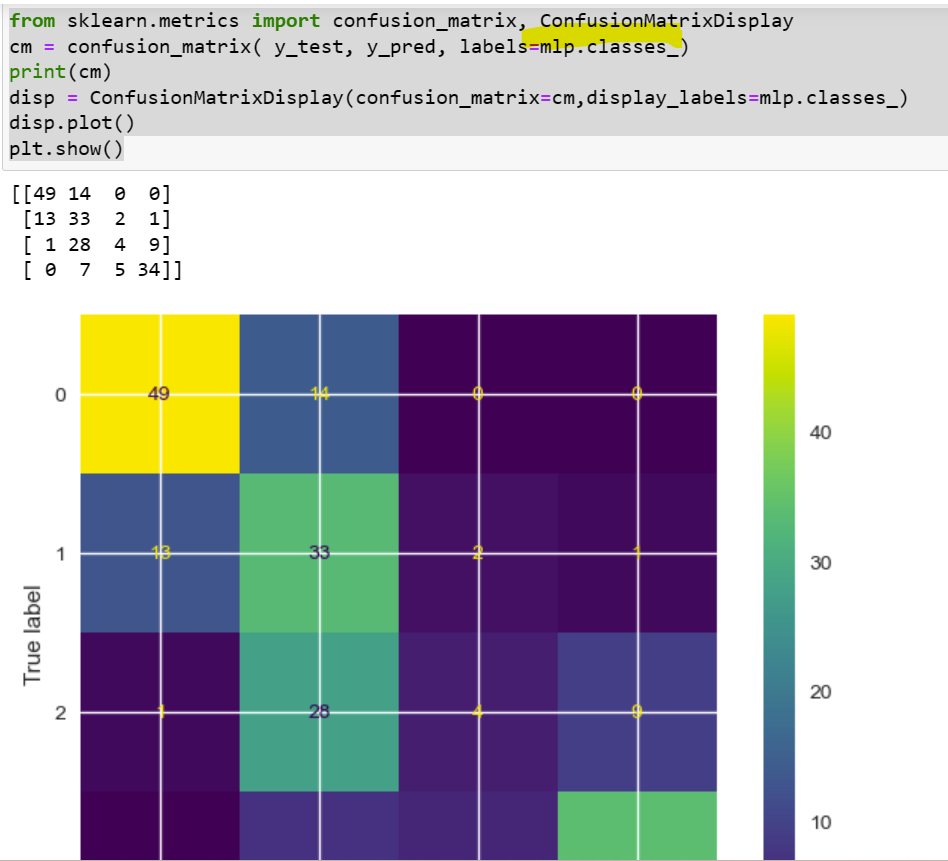

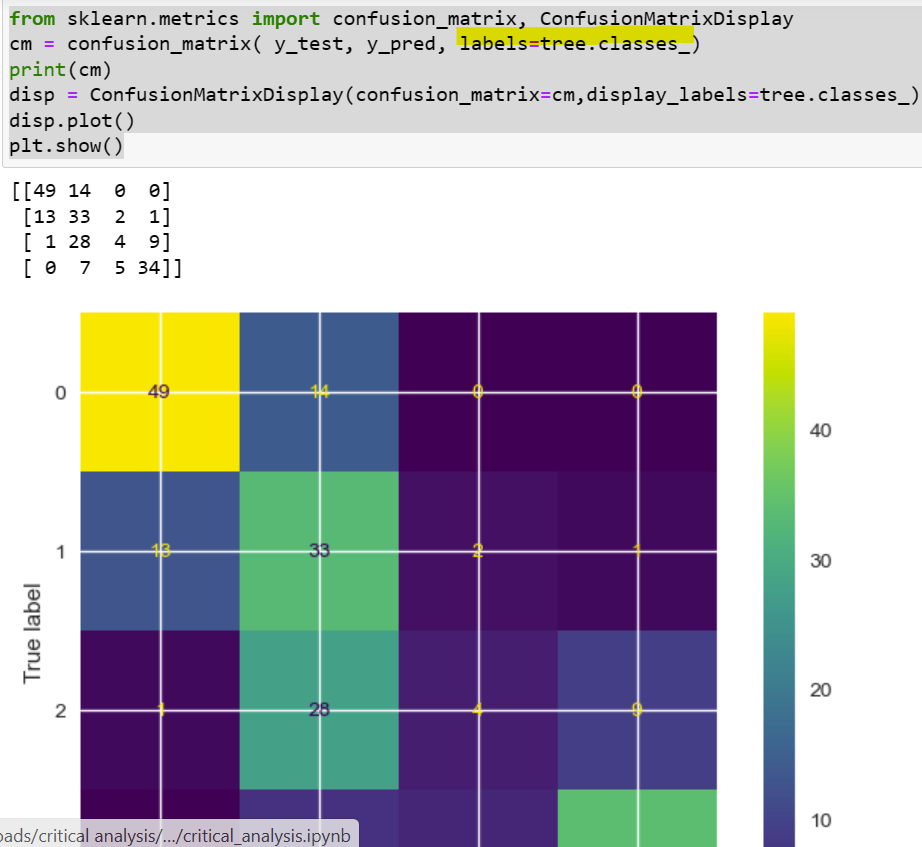

The reason why this phenomenon occurred is because y_pred was not defined for the decision tree model prior the evaluation. You can see from the screenshot below that prior the execution of the code to output the confusion matrix, y_pred is still defined for the neural network model.

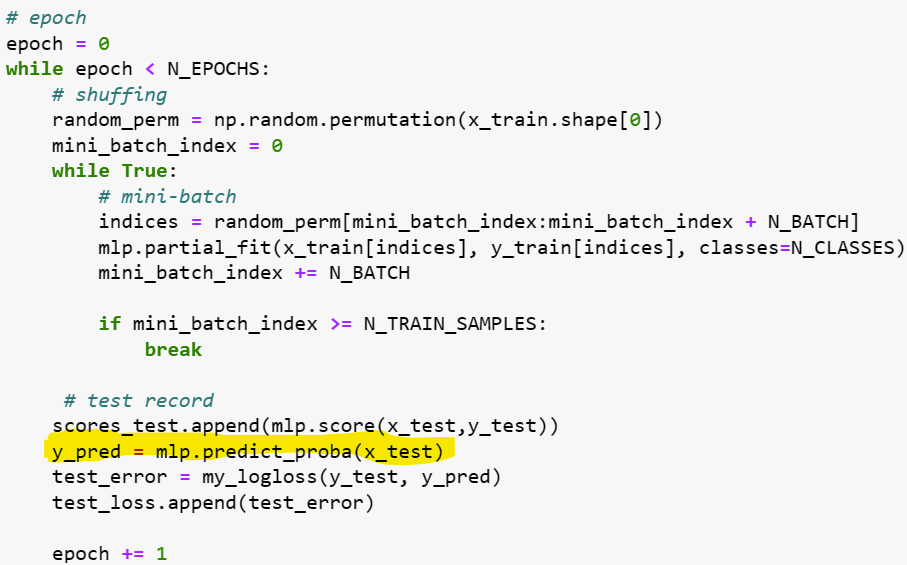

With this said, prior the evaluation of the Decision Tree Model, the code below was revised to add the correct definition of y_pred for the Decision Tree model.

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#This code was added to properly define y_pred for the Decision Tree model
y_pred = tree.predict(x_test)

cm = confusion_matrix( y_test, y_pred, labels=tree.classes_)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tree.classes_)
disp.plot()
plt.show()

It can be seen from the screenshot below that once the code has been applied, the confusion matrix output will correctly be aliged with the Decision Tree model. In actuality, the confusion matrix output of the Decision Tree model is different from the confusion matrix output based on the Neural Network model, contrary to what was shown in the Mobile Dataset notebook.

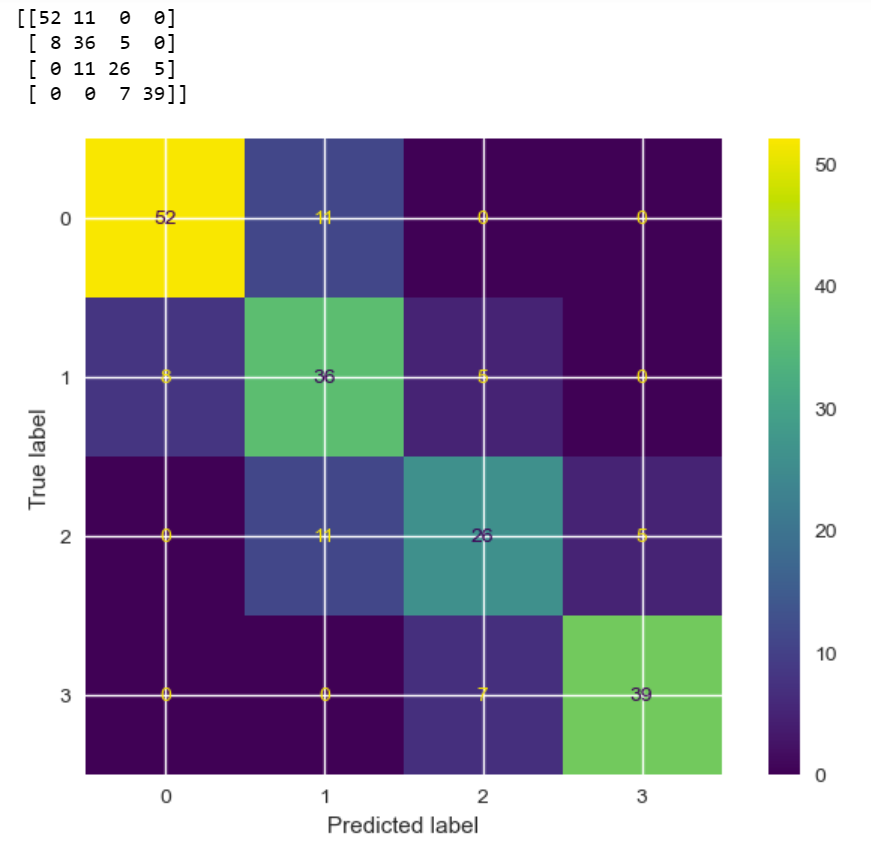

In this critical analysis report, I examined the Mobile Price Dataset and have determined several areas for improvement. In my analysis, I have pointed out that the notebook on Mobile Price Dataset lacked essential steps such as data cleanup, handling of missing and invalid values, checking for duplicates, and handling outliers. These steps are crucial to ensure the integrity and reliability of the dataset before performing any analysis.

Furthermore, the analysis did not address the issue of data distribution and normalization. Feature selection was another important aspect that was overlooked in the analysis. The notebook also did not employ the use of baseline models, which serve as a reference point for understanding the dataset and setting performance expectations.Cross-validation, which simulates multiple train-test splits, was also not performed in the analysis.Lastly, the hyperparameter settings of the models were not thoroughly evaluated. Hyperparameters play a crucial role in model performance, and their selection should be based on comprehensive evaluation. 

In conclusion, the Mobile Price Dataset analysis requires improvements in data cleanup, feature selection, data distribution handling, baseline model selection, cross-validation, and hyperparameter tuning. By addressing these areas, the analysis can enhance its reliability, interpretability, and predictive performance, ultimately providing more valuable insights and findings.